# *Лабортаторная работа №2Глобин Дмитрий Алексеевич Б9122-01.03.02мкт*

**Миша я тебя люблю <3 <3**

# Тема: Искусственный нейрон и однослойный перцептрон

Искусственный нейрон — это математическая модель биологического нейрона.

Он получает на вход несколько значений x1, x2, ..., xn,
умножает их на соответствующие веса w1, w2, ..., wn,
добавляет смещение (bias) и пропускает результат через функцию активации.

Формула работы нейрона:
y = f(w1*x1 + w2*x2 + b)

где:
  - w — веса,
  - b — смещение (bias),
  - f — функция активации (например, сигмоида, ReLU, tanh).

Однослойный перцептрон — это простейшая нейронная сеть, состоящая из одного слоя искусственных нейронов.

Каждый нейрон принимает на вход несколько признаков и выдает один выход.

Если нейронов несколько, то их выходы формируют вектор — предсказание сети.

Перцептрон способен решать задачи линейной классификации — то есть разделять данные, которые можно отделить прямой или гиперплоскостью.

Однако он не может решить задачи, где классы разделяются нелинейно (например, логическую операцию XOR).

Правило обучения перцептрона:

w = w + η * (y_true - y_pred) * x
где:
  - η — скорость обучения,
  - y_true — истинное значение,
  - y_pred — предсказанное.

Таким образом, перцептрон корректирует веса, если предсказание неверное, постепенно улучшая свою способность различать классы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def neuron_output(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

In [3]:
SIZE = 100
SEED = 45

In [4]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)


w = np.random.randn(2)
b = 0.0

outputs = neuron_output(X, w, b)

y_pred = (outputs > 0.5).astype(int)


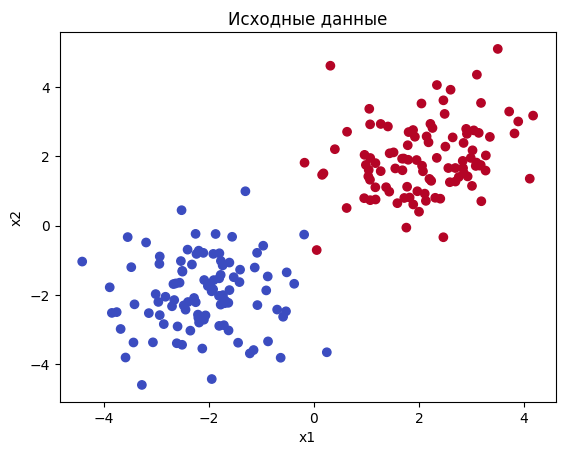

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
def plot_decision_boundary(w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title('Граница решений однослойного перцептрона')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


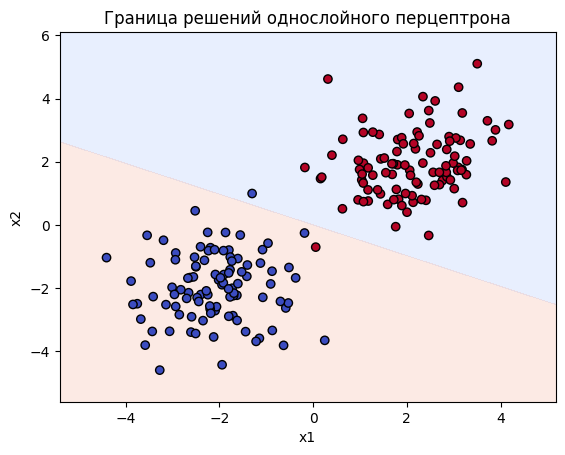

In [7]:
plot_decision_boundary(w, b)

In [8]:
LEARNING_RATE = 0.1
EPOCHS = 10

In [9]:
b = 0.0

losses = []

for epoch in range(EPOCHS):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        w += LEARNING_RATE * error * X[i]
        b += LEARNING_RATE * error
    preds = np.array([1 if np.dot(x, w) + b >= 0 else 0 for x in X])
    acc = (preds == y).mean()
    losses.append(1 - acc)
    print(f"Эпоха {epoch+1}/{EPOCHS} — точность: {acc:.4f}")



Эпоха 1/10 — точность: 0.9950
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9900
Эпоха 5/10 — точность: 0.9950
Эпоха 6/10 — точность: 0.9950
Эпоха 7/10 — точность: 0.9950
Эпоха 8/10 — точность: 0.9950
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


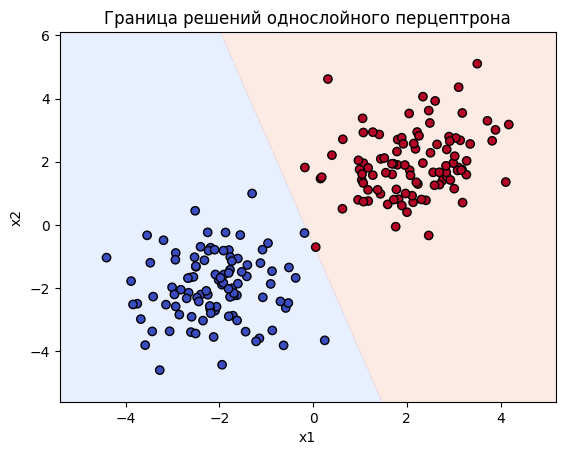

In [10]:
plot_decision_boundary(w, b)

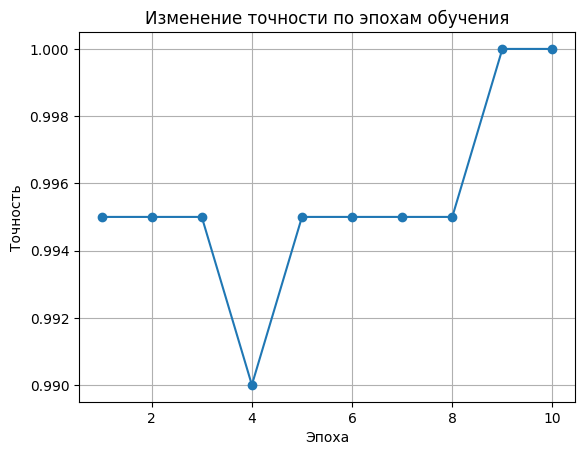

In [11]:
plt.plot(range(1, EPOCHS + 1), [1 - l for l in losses], marker='o')
plt.title('Изменение точности по эпохам обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)
plt.show()


1. Что делает функция активации в искусственном нейроне2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?


# Раздел: Функции активации F(S) (ровно как в презентации)
Реализованы: пороговая, знаковая, линейная, линейная с насыщением, сигмоидальная, tanh. Параметры можно править в константах ниже.

In [12]:

import numpy as np
import matplotlib.pyplot as plt
# Гарантируем inline отрисовку в классическом ноутбуке
try:
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

# CONSTANTS (если в вашей презентации другие значения — поправьте здесь)
THRESHOLD = 0.0
K_LINEAR  = 1.0
SAT_A     = -1.0
SAT_B     = 1.0
SIG_K     = 1.0

def F_step(S, threshold=THRESHOLD):
    S = np.asarray(S)
    return (S >= threshold).astype(float)

def F_sign(S):
    S = np.asarray(S)
    return np.where(S >= 0.0, 1.0, -1.0)

def F_linear(S, k=K_LINEAR):
    S = np.asarray(S)
    return k*S

def F_satlin(S, a=SAT_A, b=SAT_B):
    S = np.asarray(S)
    return np.clip(S, a, b)

def F_sigma(S, k=SIG_K):
    S = np.asarray(S)
    S = np.clip(S, -500, 500)
    return 1.0/(1.0 + np.exp(-k*S))

def F_tanh(S):
    return np.tanh(S)


## Проверка: графики F(S)

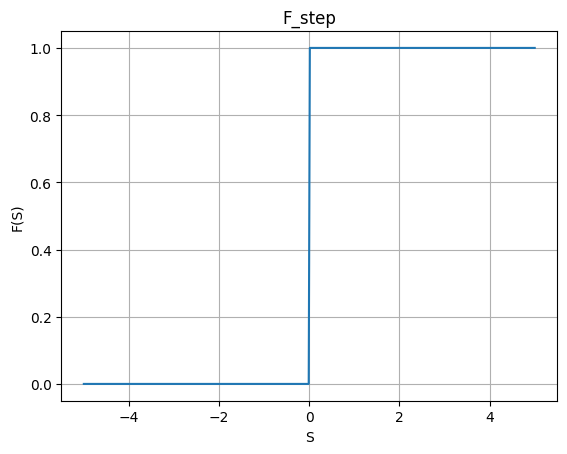

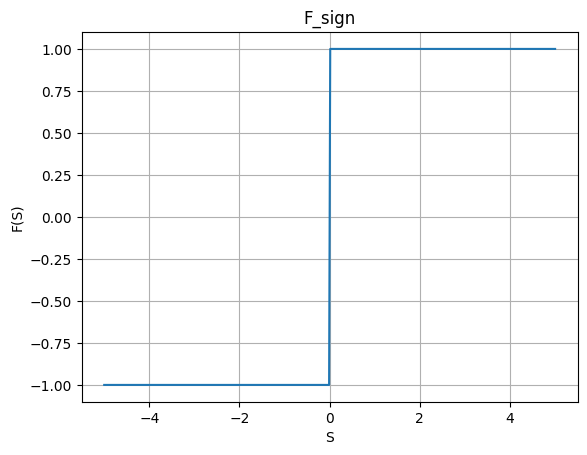

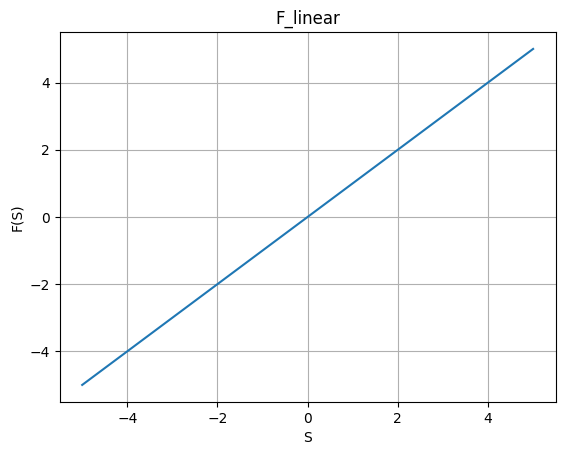

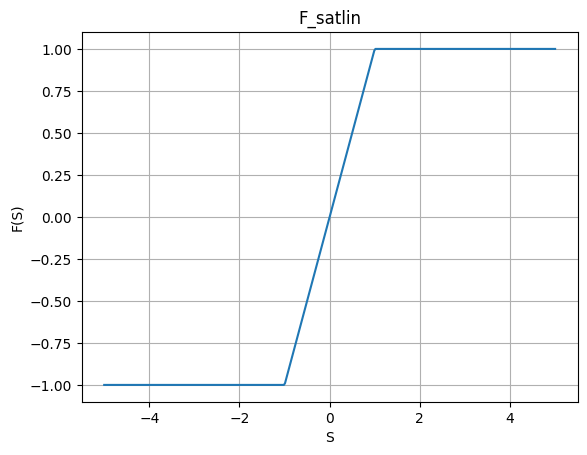

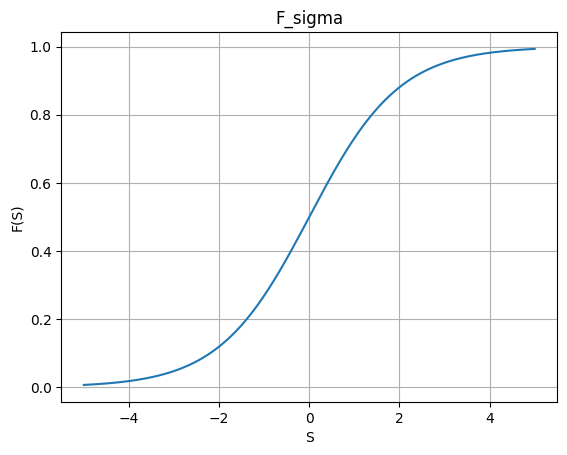

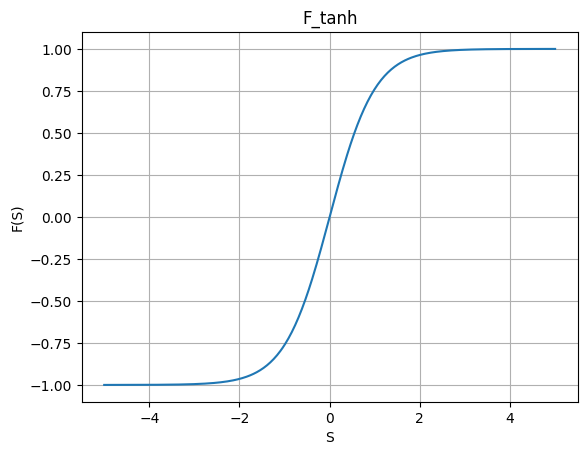

In [13]:

xs = np.linspace(-5, 5, 400)
funcs = {
    "F_step":   F_step(xs),
    "F_sign":   F_sign(xs),
    "F_linear": F_linear(xs),
    "F_satlin": F_satlin(xs),
    "F_sigma":  F_sigma(xs),
    "F_tanh":   F_tanh(xs),
}

for name, ys in funcs.items():
    plt.figure()
    plt.plot(xs, ys)
    plt.title(name); plt.xlabel("S"); plt.ylabel("F(S)"); plt.grid(True)
    plt.show()


## Однослойный перцептрон с выбором F(S)

In [14]:

from dataclasses import dataclass

def _forward(z, name):
    if name == "F_step":   return F_step(z)
    if name == "F_sigma":  return F_sigma(z)
    if name == "F_tanh":   return (F_tanh(z)+1)/2.0      # переносим к [0,1] для порога
    if name == "F_linear": return F_sigma(F_linear(z))   # слегка "сжимаем" к [0,1], чтобы был порог
    if name == "F_satlin": return F_sigma(F_satlin(z))   # то же
    if name == "F_sign":   return (F_sign(z)+1)/2.0      # {-1,1} -> {0,1}
    raise ValueError("Unknown activation")

@dataclass
class Perceptron:
    n_features: int
    activation_name: str = "F_step"
    lr: float = 0.1
    epochs: int = 100
    random_state: int = 42
    threshold: float = 0.5

    def __post_init__(self):
        rng = np.random.default_rng(self.random_state)
        self.w = rng.normal(scale=0.1, size=self.n_features)
        self.b = 0.0

    def predict_proba(self, X):
        z = X @ self.w + self.b
        return _forward(z, self.activation_name)

    def predict(self, X):
        p = self.predict_proba(X)
        return (p >= self.threshold).astype(int)

    def fit(self, X, y):
        X = np.asarray(X, float)
        y = np.asarray(y, float).ravel()

        if self.activation_name == "F_step":
            # Классическое правило обучения перцептрона (Розенблатт)
            for _ in range(self.epochs):
                for xi, yi in zip(X, y):
                    yhat = 1.0 if (xi @ self.w + self.b) >= 0 else 0.0
                    err = yi - yhat
                    if err != 0.0:
                        self.w += self.lr * err * xi
                        self.b += self.lr * err
            return self

        # Численная производная для общего случая F(S), MSE по вероятности
        eps = 1e-4
        for _ in range(self.epochs):
            z = X @ self.w + self.b
            p = _forward(z, self.activation_name)
            diff = (p - y)

            p_plus  = _forward(z + eps, self.activation_name)
            p_minus = _forward(z - eps, self.activation_name)
            dfdz = (p_plus - p_minus) / (2*eps)

            dL_dz = diff * dfdz
            grad_w = X.T @ dL_dz / X.shape[0]
            grad_b = dL_dz.mean()

            self.w -= self.lr * grad_w
            self.b -= self.lr * grad_b
        return self


## Демонстрация влияния активации на поведение перцептрона

In [15]:

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=400, centers=2, random_state=0, cluster_std=1.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

names = ["F_step","F_sigma","F_tanh","F_linear","F_satlin","F_sign"]
for name in names:
    clf = Perceptron(n_features=2, activation_name=name, lr=0.2 if name!="F_step" else 0.1, epochs=100, random_state=1)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{name:>8} | acc={acc:.3f} | w={clf.w} | b={clf.b}")


  F_step | acc=0.942 | w=[ 0.53476576 -0.86442222] | b=1.9000000000000004
 F_sigma | acc=0.900 | w=[ 0.64385833 -0.64887495] | b=0.3613231837637386
  F_tanh | acc=0.917 | w=[ 0.39955404 -0.4783463 ] | b=0.49091909016908913
F_linear | acc=0.900 | w=[ 0.64385833 -0.64887495] | b=0.3613231837637386
F_satlin | acc=0.908 | w=[ 0.47578687 -0.48282349] | b=0.3404123610202448
  F_sign | acc=0.450 | w=[0.03455842 0.08216181] | b=0.0


## Ответы на вопросы из ноутбука

1) Что такое функция активации и зачем она нужна?

Нелинейное преобразование суммы входов нейрона. Даёт порог/насыщение и позволяет аппроксимацию нелинейностей.

2) Как меняется поведение однослойного перцептрона при смене F(S)?

Step — жёсткая линейная граница (нужно линейно разделимое). Sigmoid/tanh — мягкая вероятность и градиентное обучение. Линейная/с насыщением — ведут себя почти как линейный классификатор (мы добавили сжатие к [0,1] для порога). Sign — бинаризация выходов; для классификации переводим к {0,1}.

3) Плюсы/минусы каждой F(S)? Кратко:

- F_step: + простота, - нет градиента.
- F_sigma: + вероятности, - может насыщаться.
- F_tanh: + нулевая центрировка, - тоже насыщение.
- F_linear: + простота, - без насыщения; по сути линейная модель.
- F_satlin: + контролируемые «полки», - негладкие углы.
- F_sign: + бинарная чёткость, - нет градиента.